In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=18)

## Load Data

In [2]:
s_wlwl = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_wlwl = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/wlwl.yml"), Loader=yaml.FullLoader)

s_gcgc = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_gcgc = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc.yml"), Loader=yaml.FullLoader)

s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

In [5]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")
cle_wlwl = pacc.ClsEnsemble(s_wlwl, y_wlwl, label="CosmoDC2 wlwl - data")
cle_gcgc = pacc.ClsEnsemble(s_gcgc, y_gcgc, label="CosmoDC2 gcgc - data")

In [ ]:
tpts = np.load("covs/COSMODC2/comp_covs.npz")

tt_dz = tpts["TT_dz"]
tt_wzdz = tpts["TT_wzdz"]
tt_pca = tpts["TT_pca"]
tt_gp = tpts["TT_gp"]
cov = tpts["cov"]
total_l = 0
_tt_dz = []
_tt_wzdz = []
_tt_pca = []
_tt_gp = []
_cov = []
for d in cle_3x2.data:
    dz = tt_dz[total_l:total_l+len(d)]
    wzdz = tt_wzdz[total_l:total_l+len(d)]
    pca = 1000*tt_pca[total_l:total_l+len(d)]
    gp = tt_gp[total_l:total_l+len(d)]
    c = cov[total_l:total_l+len(d)]
    _tt_dz.append(dz/c)
    _tt_wzdz.append(wzdz/c)
    _tt_pca.append(pca/c)
    _tt_gp.append(gp/c)
    _cov.append(c)
    total_l += len(d)

cle_3x2_tt_dz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$\delta z$")
cle_3x2_tt_dz.errs = _tt_dz
cle_3x2_tt_wzdz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$w_z \, \delta z$")
cle_3x2_tt_wzdz.errs = _tt_wzdz
cle_3x2_tt_pca = pacc.ClsEnsemble(s_3x2, y_3x2,   label="PCA")
cle_3x2_tt_pca.errs = _tt_pca
cle_3x2_tt_gp = pacc.ClsEnsemble(s_3x2, y_3x2,   label="GP")
cle_3x2_tt_gp.errs = _tt_gp

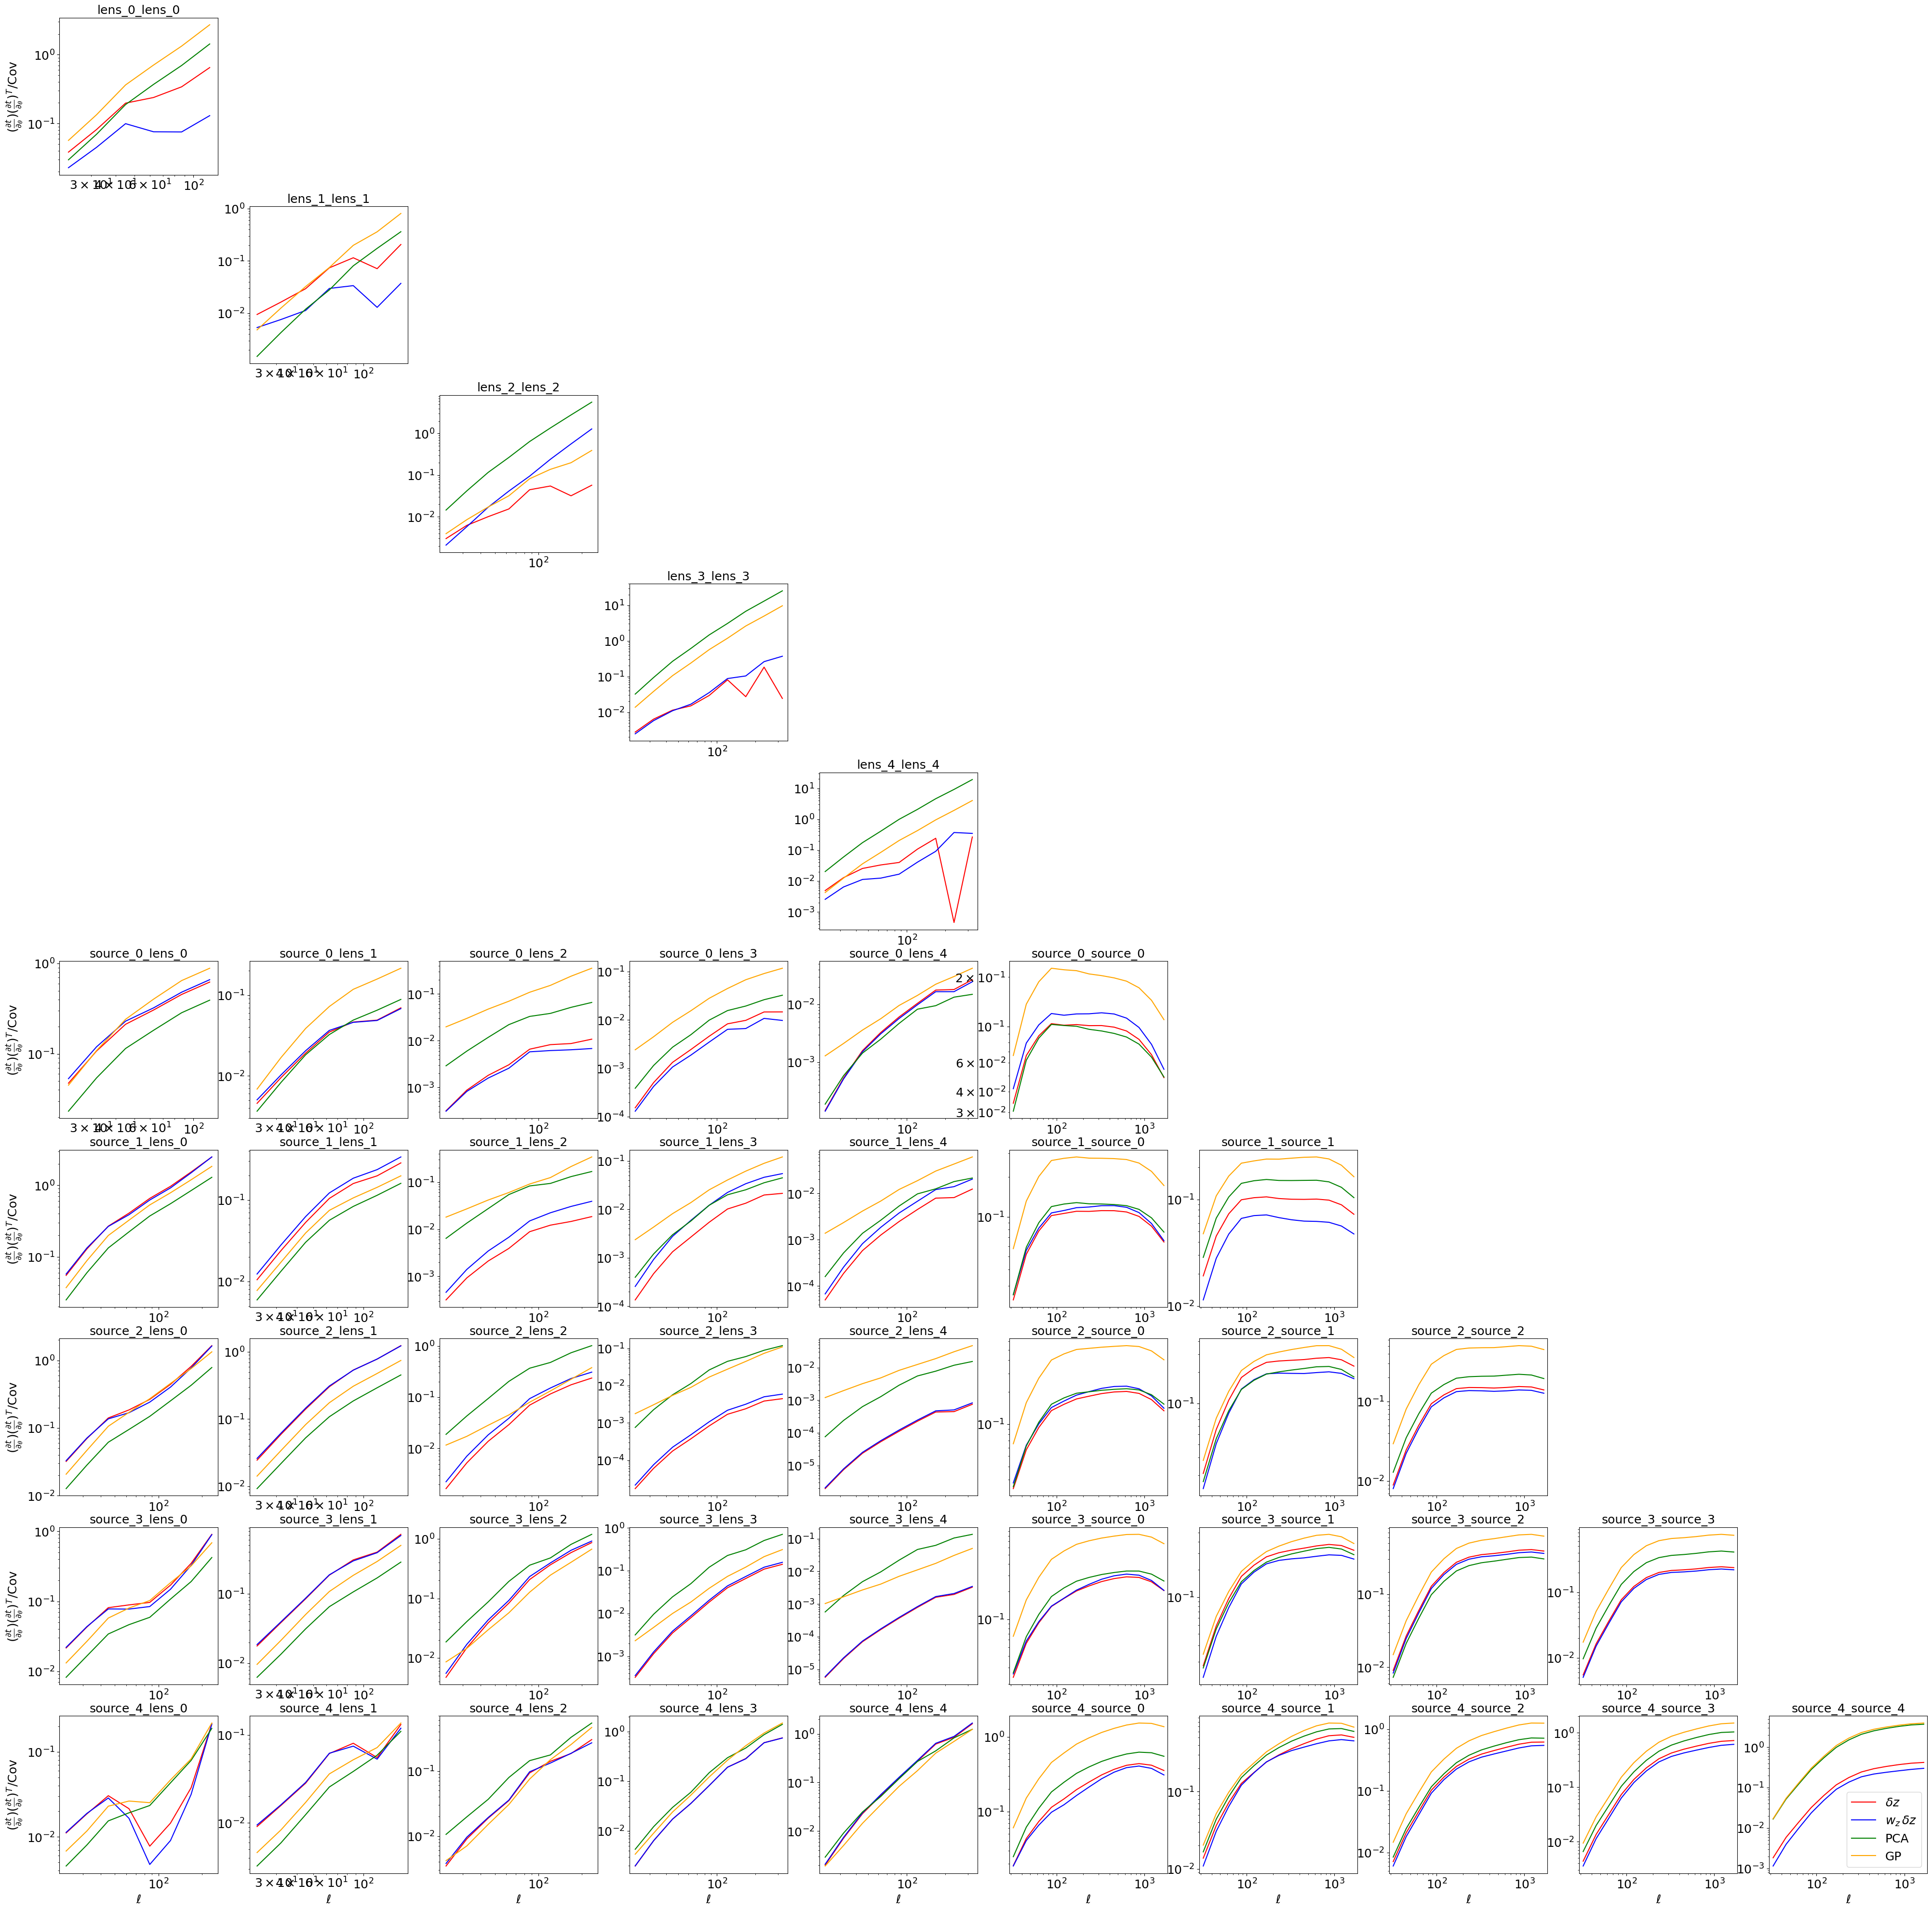

In [52]:
colors = ['r', 'b', 'g', 'orange']
pacc.plot_errs([[cle_3x2_tt_dz, cle_3x2_tt_wzdz, cle_3x2_tt_pca, cle_3x2_tt_gp]], cle_3x2.pairs,
               configs=[{'colors': colors},
                        {'colors': colors}, 
                        {'colors': colors}, 
                        {'colors': colors}],);

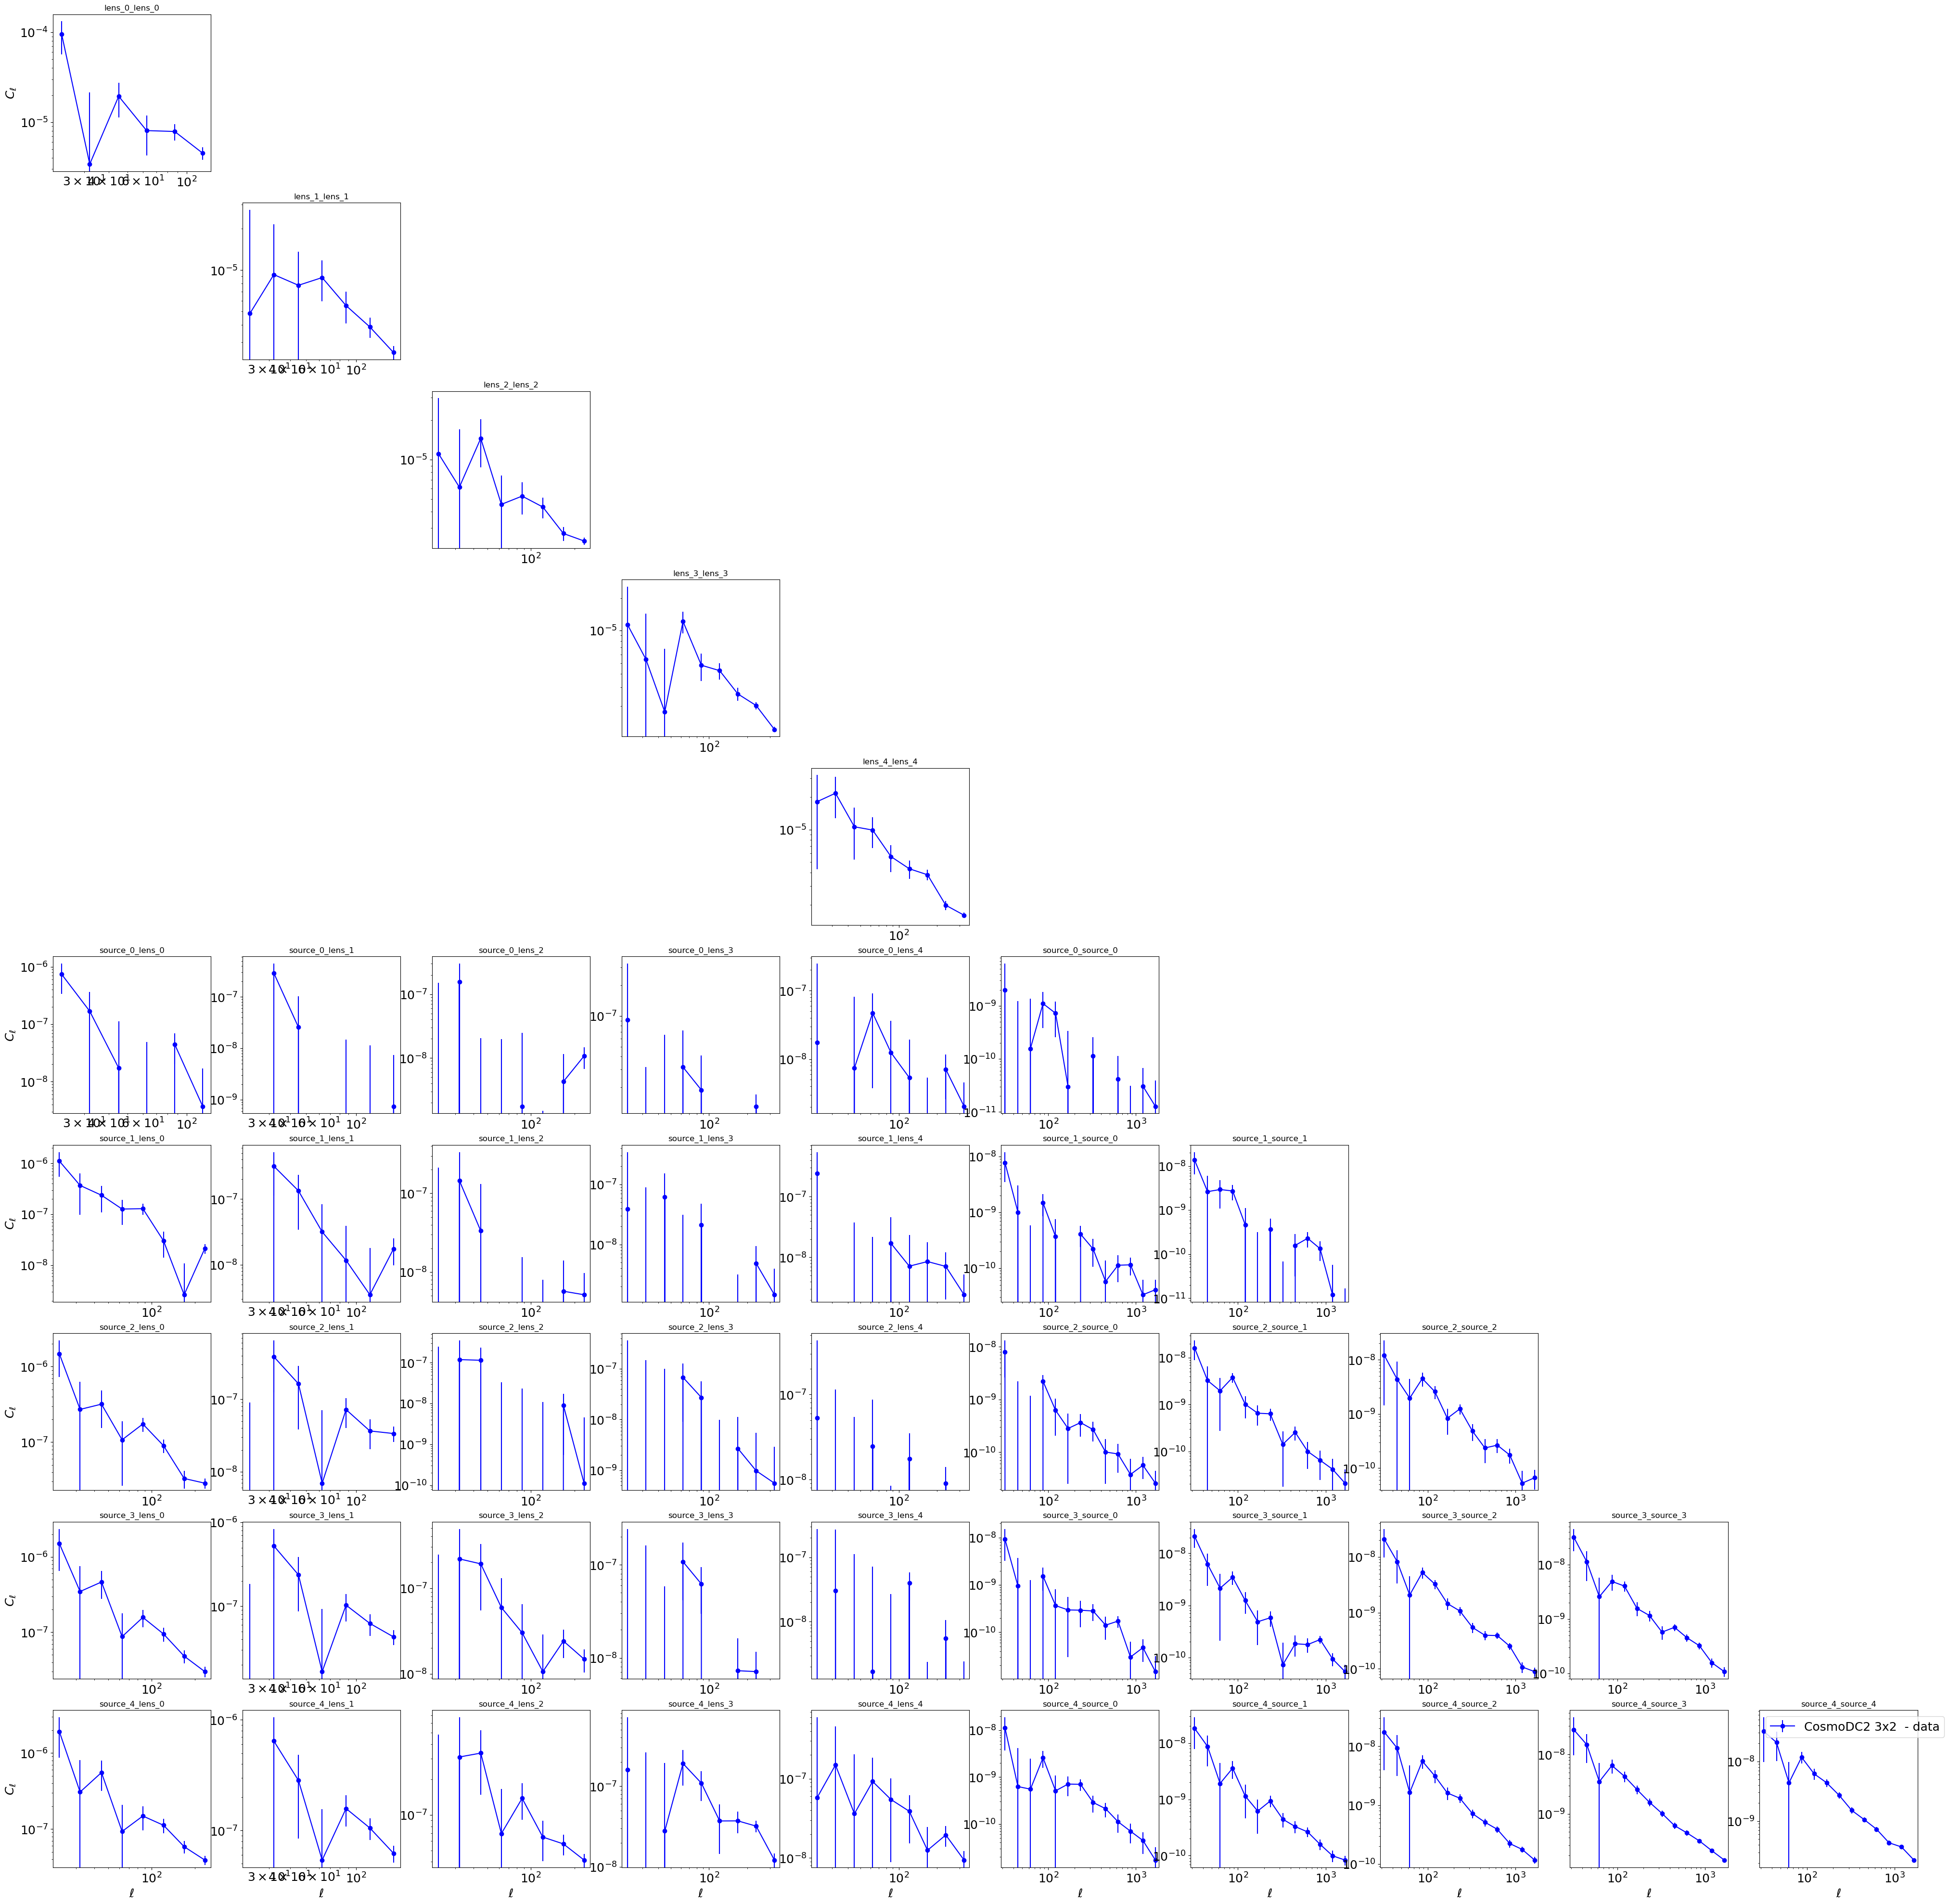

In [10]:
pacc.plot_cls([[cle_3x2]], cle_3x2.pairs);

In [11]:
wzdz_path = "./data/CosmoDC2/image_wzdz_bpz_priors/wzdz_prior.npz"
wzdz_prior = np.load(wzdz_path)
prior_samples = []
for i in range(10_000):
    prior_sample = np.random.multivariate_normal(wzdz_prior["mean"],
                                                wzdz_prior["cov"])
    prior_samples.append(prior_sample)
prior_samples = np.array(prior_samples).T
prior_wzdz_chain = {}
prior_wzdz_chain["dzs_lens[1]"] = prior_samples[0]
prior_wzdz_chain["wzs_lens[1]"] = prior_samples[1]
prior_wzdz_chain["dzs_lens[2]"] = prior_samples[2]
prior_wzdz_chain["wzs_lens[2]"] = prior_samples[3]
prior_wzdz_chain["dzs_lens[3]"] = prior_samples[4]
prior_wzdz_chain["wzs_lens[3]"] = prior_samples[5]
prior_wzdz_chain["dzs_lens[4]"] = prior_samples[6]
prior_wzdz_chain["wzs_lens[4]"] = prior_samples[7]
prior_wzdz_chain["dzs_lens[5]"] = prior_samples[8]
prior_wzdz_chain["wzs_lens[5]"] = prior_samples[9]
prior_wzdz_chain["dzs_source[1]"] = prior_samples[10]
prior_wzdz_chain["wzs_source[1]"] = prior_samples[11]
prior_wzdz_chain["dzs_source[2]"] = prior_samples[12]
prior_wzdz_chain["wzs_source[2]"] = prior_samples[13]
prior_wzdz_chain["dzs_source[3]"] = prior_samples[14]
prior_wzdz_chain["wzs_source[3]"] = prior_samples[15]
prior_wzdz_chain["dzs_source[4]"] = prior_samples[16]
prior_wzdz_chain["wzs_source[4]"] = prior_samples[17]
prior_wzdz_chain["dzs_source[5]"] = prior_samples[18]
prior_wzdz_chain["wzs_source[5]"] = prior_samples[19]


In [12]:
dz_path = "./data/CosmoDC2/image_dz_bpz_priors/dz_prior.npz"
dz_prior = np.load(dz_path)
prior_samples = []
for i in range(10_000):
    prior_sample = np.random.multivariate_normal(dz_prior["mean"],
                                                dz_prior["cov"])
    prior_samples.append(prior_sample)
prior_samples = np.array(prior_samples).T
prior_dz_chain = {}
prior_dz_chain["dzs_lens[1]"] = prior_samples[0]
prior_dz_chain["dzs_lens[2]"] = prior_samples[1]
prior_dz_chain["dzs_lens[3]"] = prior_samples[2]
prior_dz_chain["dzs_lens[4]"] = prior_samples[3]
prior_dz_chain["dzs_lens[5]"] = prior_samples[4]
prior_dz_chain["dzs_source[1]"] = prior_samples[5]
prior_dz_chain["dzs_source[2]"] = prior_samples[6]
prior_dz_chain["dzs_source[3]"] = prior_samples[7]
prior_dz_chain["dzs_source[4]"] = prior_samples[8]
prior_dz_chain["dzs_source[5]"] = prior_samples[9]


## Load Chains

In [13]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [14]:
path_real_gcgc_nomarg = "chains/nomarg/CosmoDC2_gcgc_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_real_wlwl_nomarg = "chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"
path_real_3x2_nomarg = "chains/nomarg/CosmoDC2_3x2_bp_nomarg_TAP_0.65_init_ϵ_0.03/"

path_real_nuisance_gcgc_nomarg = "chains/nomarg/CosmoDC2_gcgc_nuisances_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_real_nuisance_3x2_nomarg = "chains/nomarg/CosmoDC2_3x2_nuisances_bp_nomarg_TAP_0.65_init_ϵ_0.03/"

path_3x2_nomarg = "fake_chains/nomarg/CosmoDC2_3x2_bp_nomarg_TAP_0.65_init_ϵ_0.03/"
path_gcgc_nomarg = "fake_chains/nomarg/CosmoDC2_gcgc_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_wlwl_nomarg = "fake_chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65/"

path_3x2_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"
path_gcgc_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_gcgc_nomarg_TAP_0.65_init_ϵ_0.01/"
path_wlwl_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"

path_3x2_wzdz_ana = "fake_chains/analytical/CosmoDC2_3x2_bp_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_wzdz_ana= "nuisance_fake_chains/analytical/CosmoDC2_3x2_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_gcgc_wzdz_ana = "fake_chains/analytical/CosmoDC2_gcgc_bp_wzdz_ana_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_wzdz_ana = "nuisance_fake_chains/analytical/CosmoDC2_gcgc_wzdz_ana_TAP_0.65_init_ϵ_0.01/"
path_wlwl_wzdz_ana = "fake_chains/analytical/CosmoDC2_wlwl_dzwz_ana_TAP_0.65/"
path_wlwl_nuisance_wzdz_ana = "nuisance_fake_chains/analytical/CosmoDC2_wlwl_wzdz_ana_TAP_0.65_init_ϵ_0.03/"

path_3x2_dz_ana = "fake_chains/analytical/CosmoDC2_3x2_bp_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_3x2_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_gcgc_dz_ana = "fake_chains/analytical/CosmoDC2_gcgc_bp_dz_ana_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_gcgc_dz_ana_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_ana = "fake_chains/analytical/CosmoDC2_wlwl_dz_ana_TAP_0.65/"
path_wlwl_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_wlwl_wzdz_ana_TAP_0.65_init_ϵ_0.03/"

path_gcgc_wzdz_num = "fake_chains/numerical/CosmoDC2_gcgc_bp_wzdz_num_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_wzdz_num = "nuisance_fake_chains/numerical/CosmoDC2_gcgc_wzdz_num_TAP_0.65_init_ϵ_0.01/"
path_wlwl_wzdz_num = "fake_chains/numerical/CosmoDC2_wlwl_wzdz_num_TAP_0.65/"
path_wlwl_nuisance_wzdz_num = "nuisance_fake_chains/numerical/CosmoDC2_wlwl_Gibbs_wzdz_num_TAP_0.65/"

path_gcgc_dz_num = "fake_chains/numerical/CosmoDC2_gcgc_bp_dz_num_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_dz_num = "nuisance_fake_chains/numerical/CosmoDC2_gcgc_dz_num_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_num = "fake_chains/numerical/CosmoDC2_wlwl_dz_num_TAP_0.65/"
path_wlwl_nuisance_dz_num = "nuisance_fake_chains/numerical/CosmoDC2_wlwl_Gibbs_dz_num_TAP_0.65/"

path_3x2_nuisance_wzdz_num = "nuisance_fake_chains/numerical/CosmoDC2_3x2_Gibbs_indep_wzdz_num_TAP_0.65_init_ϵ1_0.03_init_ϵ2_0.06/"
path_3x2_nuisance_dz_mum = "nuisance_fake_chains/numerical/CosmoDC2_3x2_Gibbs_indep_dz_num_TAP_0.65_init_ϵ1_0.03_init_ϵ2_0.1/"

path_3x2_nuisance_PCA_ana = "nuisance_fake_chains/analytical/CosmoDC2_3x2_PCA_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_PCA_num = "nuisance_fake_chains/numerical/CosmoDC2_3x2_Gibbs_indep_PCA_num_TAP_0.65_init_ϵ1_0.03_init_ϵ2_0.1/"

path_3x2_nuisance_gp_ana = "nuisance_fake_chains/analytical/CosmoDC2_3x2_gp_ana_TAP_0.65_init_ϵ_0.03/"

In [15]:
chain_real_gcgc_nomarg = add_chains([path_real_gcgc_nomarg])
chain_real_wlwl_nomarg = add_chains([path_real_wlwl_nomarg])
chain_real_3x2_nomarg = add_chains([path_real_3x2_nomarg])

chain_real_nuisance_gcgc_nomarg = add_chains([path_real_nuisance_gcgc_nomarg])
chain_real_nuisance_3x2_nomarg = add_chains([path_real_nuisance_3x2_nomarg])

chain_3x2_nomarg = add_chains([path_3x2_nomarg])
chain_gcgc_nomarg = add_chains([path_gcgc_nomarg])
chain_wlwl_nomarg = add_chains([path_wlwl_nomarg])

chain_3x2_nuisance_nomarg = add_chains([path_3x2_nuisance_nomarg])
chain_gcgc_nuisance_nomarg = add_chains([path_gcgc_nuisance_nomarg])
chain_wlwl_nuisance_nomarg = add_chains([path_wlwl_nuisance_nomarg])

chain_3x2_wzdz_ana = add_chains([path_3x2_wzdz_ana])
chain_3x2_nuisance_wzdz_ana = add_chains([path_3x2_nuisance_wzdz_ana])
chain_gcgc_wzdz_ana = add_chains([path_gcgc_wzdz_ana])
chain_gcgc_nuisance_wzdz_ana = add_chains([path_gcgc_nuisance_wzdz_ana])
chain_wlwl_wzdz_ana = add_chains([path_wlwl_wzdz_ana])
chain_wlwl_nuisance_wzdz_ana = add_chains([path_wlwl_nuisance_wzdz_ana])

chain_3x2_dz_ana = add_chains([path_3x2_dz_ana])
chain_3x2_nuisance_dz_ana = add_chains([path_3x2_nuisance_dz_ana])
chain_gcgc_dz_ana = add_chains([path_gcgc_dz_ana])
chain_gcgc_nuisance_dz_ana = add_chains([path_gcgc_nuisance_dz_ana])
chain_wlwl_dz_ana = add_chains([path_wlwl_dz_ana])
chain_wlwl_nuisance_dz_ana = add_chains([path_wlwl_nuisance_dz_ana])

chain_gcgc_wzdz_num = add_chains([path_gcgc_wzdz_num])
chain_gcgc_nuisance_wzdz_num = add_chains([path_gcgc_nuisance_wzdz_num])
chain_wlwl_wzdz_num = add_chains([path_wlwl_wzdz_num])
chain_wlwl_nuisance_wzdz_num = add_chains([path_wlwl_nuisance_wzdz_num])

chain_gcgc_dz_num = add_chains([path_gcgc_dz_num])
chain_gcgc_nuisance_dz_num = add_chains([path_gcgc_nuisance_dz_num])
chain_wlwl_dz_num = add_chains([path_wlwl_dz_num])
chain_wlwl_nuisance_dz_num = add_chains([path_wlwl_nuisance_dz_num])

chain_3x2_nuisance_wzdz_num = add_chains([path_3x2_nuisance_wzdz_num])
chain_3x2_nuisance_dz_num = add_chains([path_3x2_nuisance_dz_mum])

chain_3x2_nuisance_PCA_ana = add_chains([path_3x2_nuisance_PCA_ana])
chain_3x2_nuisance_PCA_num = add_chains([path_3x2_nuisance_PCA_num])

chain_3x2_nuisance_gp_ana = add_chains([path_3x2_nuisance_gp_ana])

In [16]:
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_0[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_0[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_1[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_1[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_2[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_2[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_3[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_3[1]"]))
print(np.mean(chain_3x2_nuisance_PCA_num["alphas_lens_4[1]"]), np.std(chain_3x2_nuisance_PCA_num["alphas_lens_4[1]"]))

0.0018720413985967256 0.9996851377724439
0.016639068626004817 1.0932344240673424
-0.014680271697600536 0.9274915037241259
0.002068157573294414 1.010872635387693
0.03232478664752462 1.003945381677371


## Trace plots

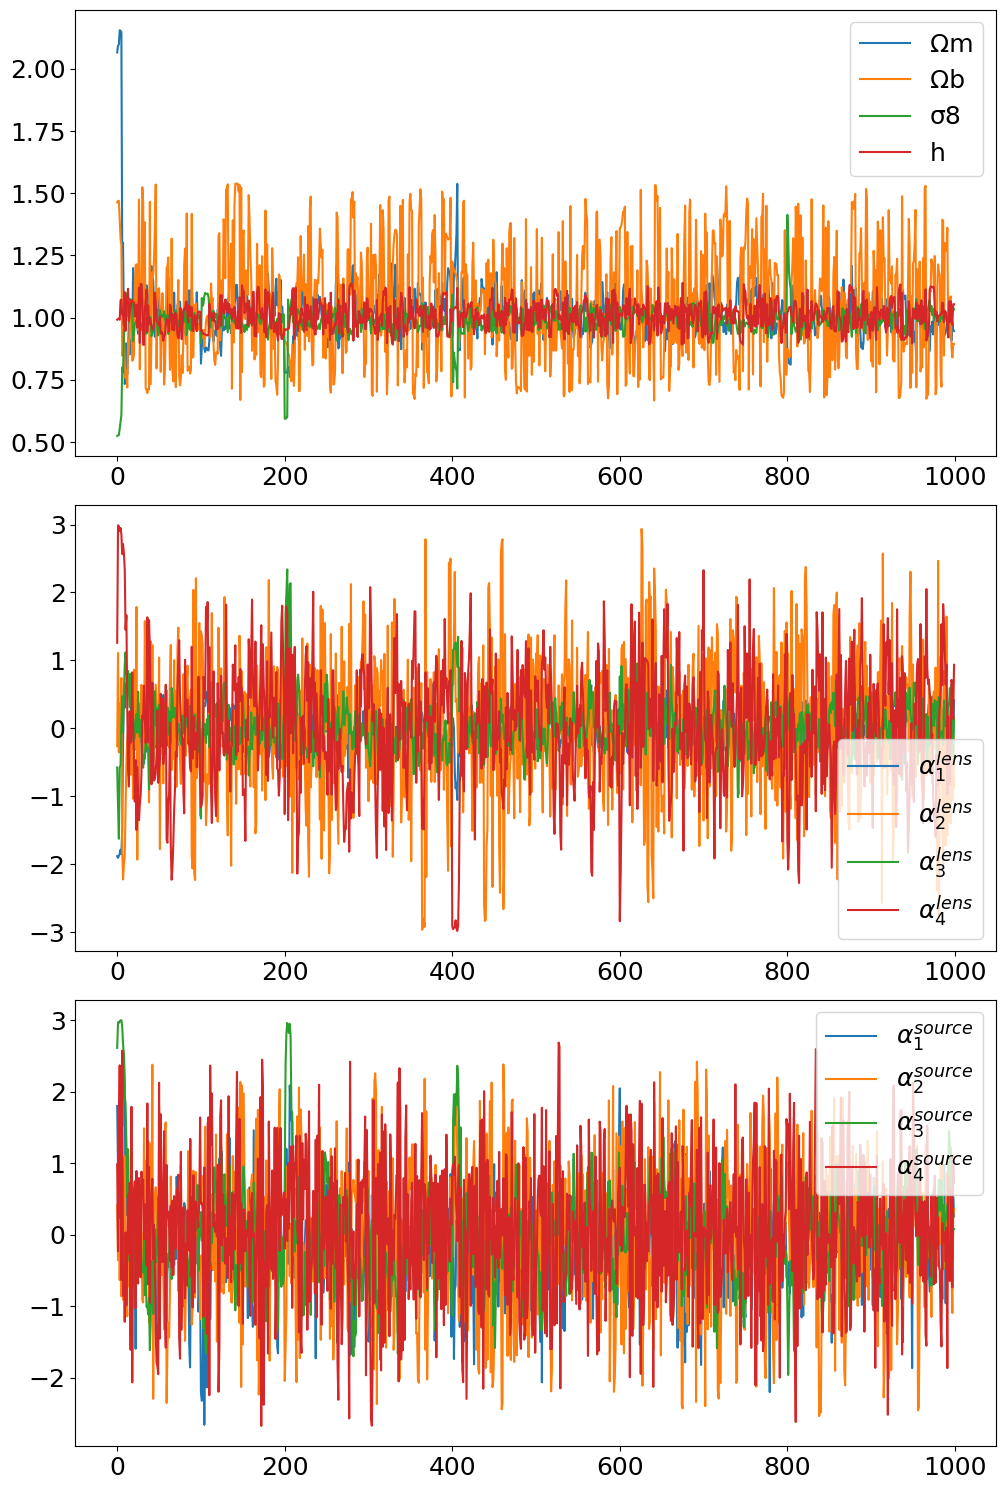

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_wzdz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.2734714358876248, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.042170616570847225, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.7790071910238021, label="σ8")
axs[0].plot(np.array(chain["h"])/0.7189925511925751, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens[1]"]), label=r"$\alpha^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens[2]"]), label=r"$\alpha^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens[3]"]), label=r"$\alpha^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens[4]"]), label=r"$\alpha^{lens}_4$")
axs[1].legend()

# Third plot
axs[2].plot(np.array(chain["alphas_source[1]"]), label=r"$\alpha^{source}_1$")
axs[2].plot(np.array(chain["alphas_source[2]"]), label=r"$\alpha^{source}_2$")
axs[2].plot(np.array(chain["alphas_source[3]"]), label=r"$\alpha^{source}_3$")
axs[2].plot(np.array(chain["alphas_source[4]"]), label=r"$\alpha^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

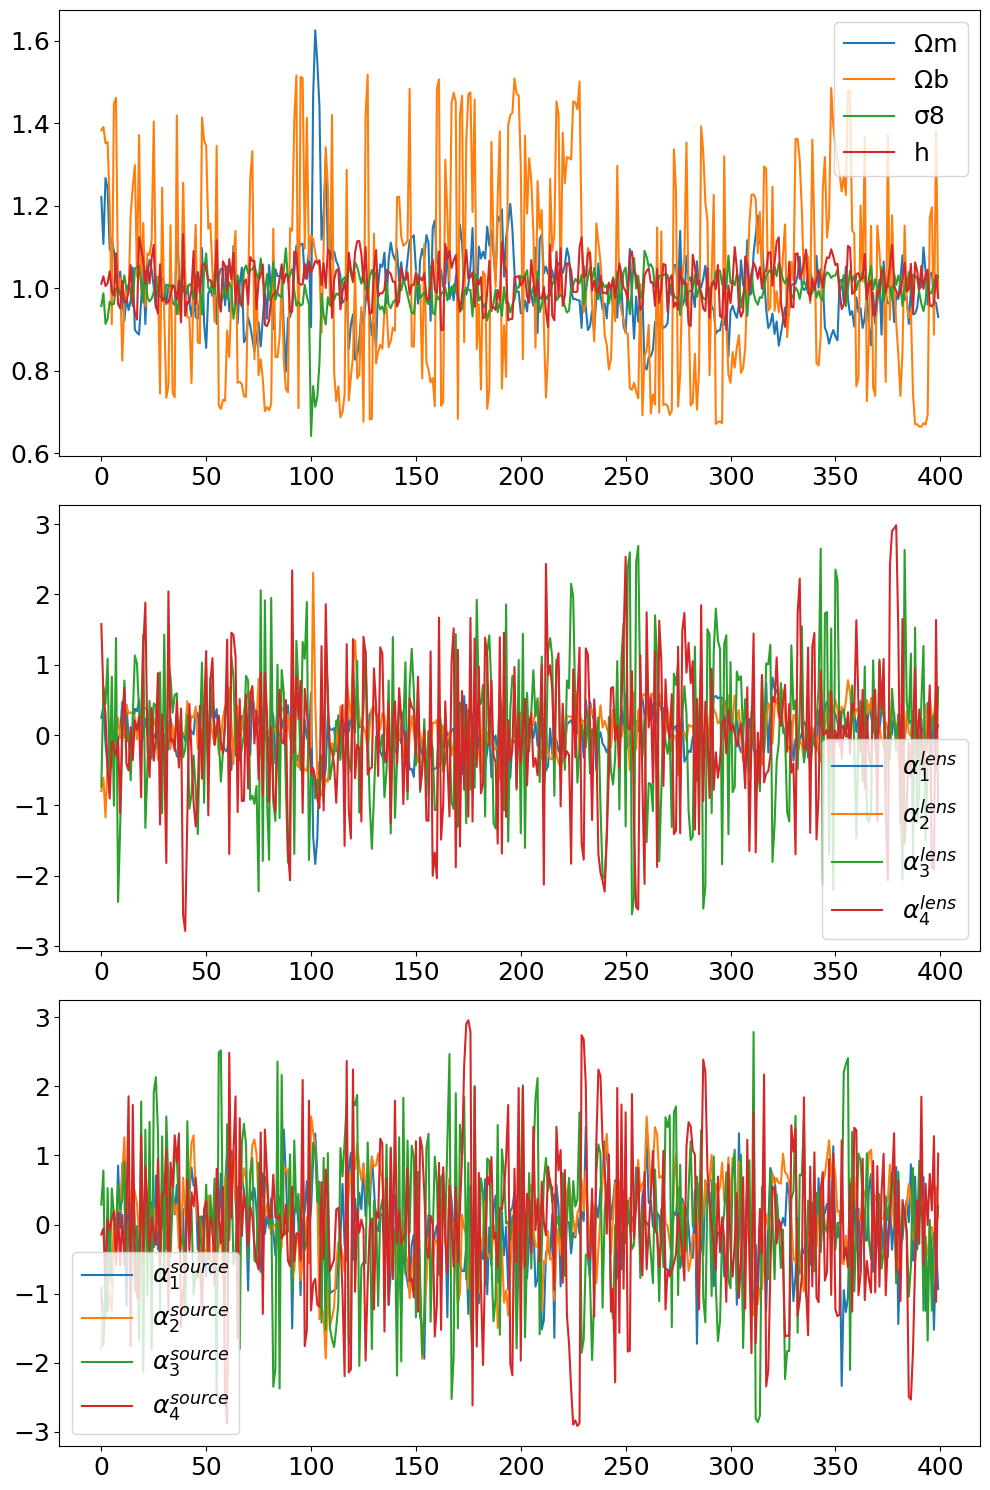

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_dz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.2734714358876248, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.042170616570847225, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.7790071910238021, label="σ8")
axs[0].plot(np.array(chain["h"])/0.7189925511925751, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens[1]"]), label=r"$\alpha^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens[2]"]), label=r"$\alpha^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens[3]"]), label=r"$\alpha^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens[4]"]), label=r"$\alpha^{lens}_4$")
axs[1].legend()

# Third plot
axs[2].plot(np.array(chain["alphas_source[1]"]), label=r"$\alpha^{source}_1$")
axs[2].plot(np.array(chain["alphas_source[2]"]), label=r"$\alpha^{source}_2$")
axs[2].plot(np.array(chain["alphas_source[3]"]), label=r"$\alpha^{source}_3$")
axs[2].plot(np.array(chain["alphas_source[4]"]), label=r"$\alpha^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

## Posteriors

In [19]:
labels_dict = {'h': 'h',
               'Ωm': r'\Omega_m',
               'Ωb': r'\Omega_b',
               'ns': 'n_s',
               'σ8': r'\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',

               'lens_1_b': r'b_{lens}^{1}',
               'lens_2_b': r'b_{lens}^{2}',
               'lens_3_b': r'b_{lens}^{3}',
               'lens_4_b': r'b_{lens}^{4}',
               'lens_5_b': r'b_{lens}^{5}',
               
               'dzs[1]': r'\Delta^{1}_{z, lens}',
               'dzs[2]': r'\Delta^{2}_{z, lens}',
               'dzs[3]': r'\Delta^{3}_{z, lens}',
               'dzs[4]': r'\Delta^{4}_{z, lens}',
               'dzs[5]': r'\Delta^{5}_{z, lens}',
               'dzs[6]': r'\Delta^{1}_{z, source}',
               'dzs[7]': r'\Delta^{2}_{z, source}',
               'dzs[8]': r'\Delta^{3}_{z, source}',
               'dzs[9]': r'\Delta^{4}_{z, source}',
               'dzs[10]': r'\Delta^{5}_{z, source}', 

               'wzs[1]': r'w^{1}_{z, lens}',
               'wzs[2]': r'w^{1}_{z, lens}',
               'wzs[3]': r'w^{1}_{z, lens}',
               'wzs[4]': r'w^{1}_{z, lens}',
               'wzs[5]': r'w^{1}_{z, lens}',
               'wzs[6]': r'w^{1}_{z, source}',
               'wzs[7]': r'w^{1}_{z, source}',
               'wzs[8]': r'w^{1}_{z, source}',
               'wzs[9]': r'w^{1}_{z, source}',
               'wzs[10]': r'w^{1}_{z, source}',

               'dzs_lens[1]': r'\Delta^{1}_{z, lens}',
               'dzs_lens[2]': r'\Delta^{2}_{z, lens}',
               'dzs_lens[3]': r'\Delta^{3}_{z, lens}',
               'dzs_lens[4]': r'\Delta^{4}_{z, lens}',
               'dzs_lens[5]': r'\Delta^{5}_{z, lens}',
               'dzs_source[1]': r'\Delta^{1}_{z, source}',
               'dzs_source[2]': r'\Delta^{2}_{z, source}',
               'dzs_source[3]': r'\Delta^{3}_{z, source}',
               'dzs_source[4]': r'\Delta^{4}_{z, source}',
               'dzs_source[5]': r'\Delta^{5}_{z, source}', 

               'wzs_lens[1]': r'w^{1}_{z, lens}',
               'wzs_lens[2]': r'w^{1}_{z, lens}',
               'wzs_lens[3]': r'w^{1}_{z, lens}',
               'wzs_lens[4]': r'w^{1}_{z, lens}',
               'wzs_lens[5]': r'w^{1}_{z, lens}',
               'wzs_source[1]': r'w^{1}_{z, source}',
               'wzs_source[2]': r'w^{1}_{z, source}',
               'wzs_source[3]': r'w^{1}_{z, source}',
               'wzs_source[4]': r'w^{1}_{z, source}',
               'wzs_source[5]': r'w^{1}_{z, source}',
               
               'A_IA': 'A_{IA}'}

In [20]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [21]:
samples_dz_prior = make_chain(prior_dz_chain, r"Prior - $\Delta_z$ ", labels_dict=labels_dict)
samples_wzdz_prior = make_chain(prior_wzdz_chain, r"Prior - $\Delta_z + w_z$ ", labels_dict=labels_dict)

Prior - $\Delta_z$ 
Removed no burn in
Prior - $\Delta_z + w_z$ 
Removed no burn in


In [22]:
samples_real_gcgc_nomarg = make_chain(chain_real_gcgc_nomarg, "CosmoDC2 GCGC Real - Fixed", labels_dict=labels_dict)
samples_real_wlwl_nomarg = make_chain(chain_real_wlwl_nomarg, "CosmoDC2 WLWL Real - Fixed", labels_dict=labels_dict)
samples_real_3x2_nomarg = make_chain(chain_real_3x2_nomarg, "CosmoDC2 3x2 Real - Fixed", labels_dict=labels_dict)

CosmoDC2 GCGC Real - Fixed
Removed no burn in
CosmoDC2 WLWL Real - Fixed
Removed no burn in
CosmoDC2 3x2 Real - Fixed
Removed no burn in


In [23]:
samples_real_nuisance_gcgc_nomarg = make_chain(chain_real_nuisance_gcgc_nomarg, "CosmoDC2 GCGC Real - Nuisances", labels_dict=labels_dict)
samples_real_nuisance_3x2_nomarg = make_chain(chain_real_nuisance_3x2_nomarg, "CosmoDC2 3x2 Real - Nuisances", labels_dict=labels_dict)

CosmoDC2 GCGC Real - Nuisances
Removed no burn in
CosmoDC2 3x2 Real - Nuisances
Removed no burn in


In [24]:
samples_wlwl_nomarg = make_chain(chain_wlwl_nomarg, "CosmoDC2 WLWL - Fixed")
samples_gcgc_nomarg = make_chain(chain_gcgc_nomarg, "CosmoDC2 GCGC - Fixed")
samples_3x2_nomarg  = make_chain(chain_3x2_nomarg,  "CosmoDC2 3x2 - Fixed")

CosmoDC2 WLWL - Fixed
Removed no burn in
CosmoDC2 GCGC - Fixed
Removed no burn in
CosmoDC2 3x2 - Fixed
Removed no burn in


In [25]:
samples_gcgc_nuisance_nomarg = make_chain(chain_gcgc_nuisance_nomarg, "CosmoDC2 GCGC - Fixed w/ Nuisances")
samples_3x2_nuisance_nomarg = make_chain(chain_3x2_nuisance_nomarg, "CosmoDC2 3x2 - Fixed w/ Nuisances")
samples_wlwl_nuisance_nomarg = make_chain(chain_wlwl_nuisance_nomarg, "CosmoDC2 WLWL - Fixed w/ Nuisances")

CosmoDC2 GCGC - Fixed w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - Fixed w/ Nuisances
Removed no burn in
CosmoDC2 WLWL - Fixed w/ Nuisances
Removed no burn in


In [26]:
samples_wlwl_dz_ana = make_chain(chain_wlwl_dz_ana, r"CosmoDC2 WLWL - $\Delta_z$ Analytical")
samples_wlwl_nuisance_dz_ana = make_chain(chain_wlwl_nuisance_dz_ana, r"CosmoDC2 WLWL - $\Delta_z$ Analytical w/ Nuisances")
samples_gcgc_dz_ana = make_chain(chain_gcgc_dz_ana, r"CosmoDC2 GCGC - $\Delta_z$ Analytical")
samples_gcgc_nuisance_dz_ana = make_chain(chain_gcgc_nuisance_dz_ana, r"CosmoDC2 GCGC - $\Delta_z$ Analytical w/ Nuisances")
samples_3x2_dz_ana = make_chain(chain_3x2_dz_ana, r"CosmoDC2 3x2 - $\Delta_z$ Analytical")
samples_3x2_nuisance_dz_ana = make_chain(chain_3x2_nuisance_dz_ana, r"CosmoDC2 3x2 - $\Delta_z$ Analytical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 3x2 - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in


In [27]:
samples_wlwl_wzdz_ana = make_chain(chain_wlwl_wzdz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical")
samples_wlwl_nuisance_wzdz_ana = make_chain(chain_wlwl_nuisance_wzdz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical w/ Nuisances")
samples_gcgc_wzdz_ana = make_chain(chain_gcgc_wzdz_ana, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical")
samples_gcgc_nuisance_wzdz_ana = make_chain(chain_gcgc_nuisance_wzdz_ana, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical w/ Nuisances")
samples_3x2_wzdz_ana = make_chain(chain_3x2_wzdz_ana, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical")
samples_3x2_nuisance_wzdz_ana = make_chain(chain_3x2_nuisance_wzdz_ana, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in


In [28]:
samples_wlwl_dz_num = make_chain(chain_wlwl_dz_num, r"CosmoDC2 WLWL - $\Delta_z$ Numerical")
samples_wlwl_nuisance_dz_num = make_chain(chain_wlwl_nuisance_dz_num, r"CosmoDC2 WLWL - $\Delta_z$ Numerical w/ Nuisances")
samples_gcgc_dz_num = make_chain(chain_gcgc_dz_num, r"CosmoDC2 GCGC - $\Delta_z$ Numerical")
samples_gcgc_nuisance_dz_num = make_chain(chain_gcgc_nuisance_dz_num, r"CosmoDC2 GCGC - $\Delta_z$ Numerical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z$ Numerical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z$ Numerical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Numerical w/ Nuisances
Removed no burn in


In [29]:
samples_wlwl_wzdz_num = make_chain(chain_wlwl_wzdz_num, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical")
samples_wlwl_nuisance_wzdz_num = make_chain(chain_wlwl_nuisance_wzdz_num, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical w/ Nuisances")
samples_gcgc_wzdz_num = make_chain(chain_gcgc_wzdz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical")
samples_gcgc_nuisance_wzdz_num = make_chain(chain_gcgc_nuisance_wzdz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances
Removed no burn in


In [30]:
samples_3x2_nuisance_dz_num = make_chain(chain_3x2_nuisance_dz_num, r"CosmoDC2 3x2 - $\Delta_z$ Numerical w/ Nuisances")
samples_3x2_nuisance_wzdz_num = make_chain(chain_3x2_nuisance_wzdz_num, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Numerical w/ Nuisances")

CosmoDC2 3x2 - $\Delta_z$ Numerical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Numerical w/ Nuisances
Removed no burn in


In [31]:
samples_3x2_nuisance_PCA_ana = make_chain(chain_3x2_nuisance_PCA_ana, r"CosmoDC2 3x2 - PCA Analytical w/ Nuisances")
samples_3x2_nuisance_PCA_num = make_chain(chain_3x2_nuisance_PCA_num, r"CosmoDC2 3x2 - PCA Numerical w/ Nuisances")

samples_3x2_nuisance_gp_ana = make_chain(chain_3x2_nuisance_gp_ana, r"CosmoDC2 3x2 - GP Analytical w/ Nuisances")

CosmoDC2 3x2 - PCA Analytical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - PCA Numerical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - GP Analytical w/ Nuisances
Removed no burn in


In [32]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_1_b':0.879118,
               'lens_2_b':1.05894, 
               'lens_3_b':1.22145, 
               'lens_4_b':1.35065, 
               'lens_5_b':1.58909,
               'A_IA':0.25179439}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_3x2_nuisance_nomarg,
    ],
    ['σ8',
    'lens_1_b', 'lens_2_b', 'lens_3_b', 'lens_4_b', 'lens_5_b',
    'dzs_lens[1]', 'dzs_lens[2]', 'dzs_lens[3]', 'dzs_lens[4]', 'dzs_lens[5]',
    'dzs_source[1]', 'dzs_source[2]', 'dzs_source[3]', 'dzs_source[4]', 'dzs_source[5]',
    'wzs_lens[1]', 'wzs_lens[2]', 'wzs_lens[3]', 'wzs_lens[4]', 'wzs_lens[5]',
    'wzs_source[1]', 'wzs_source[2]', 'wzs_source[3]', 'wzs_source[4]', 'wzs_source[5]',],
    param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.65, 0.9), 'S8':(0.67, 0.8)},
    markers=prat_markers,
    filled=True)

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
                 samples_3x2_nuisance_gp_ana,
                 samples_3x2_nuisance_PCA_ana,
                 samples_3x2_nuisance_wzdz_ana,
                 samples_3x2_nuisance_dz_ana,
                 samples_3x2_nuisance_nomarg,
                 ],
                 #['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

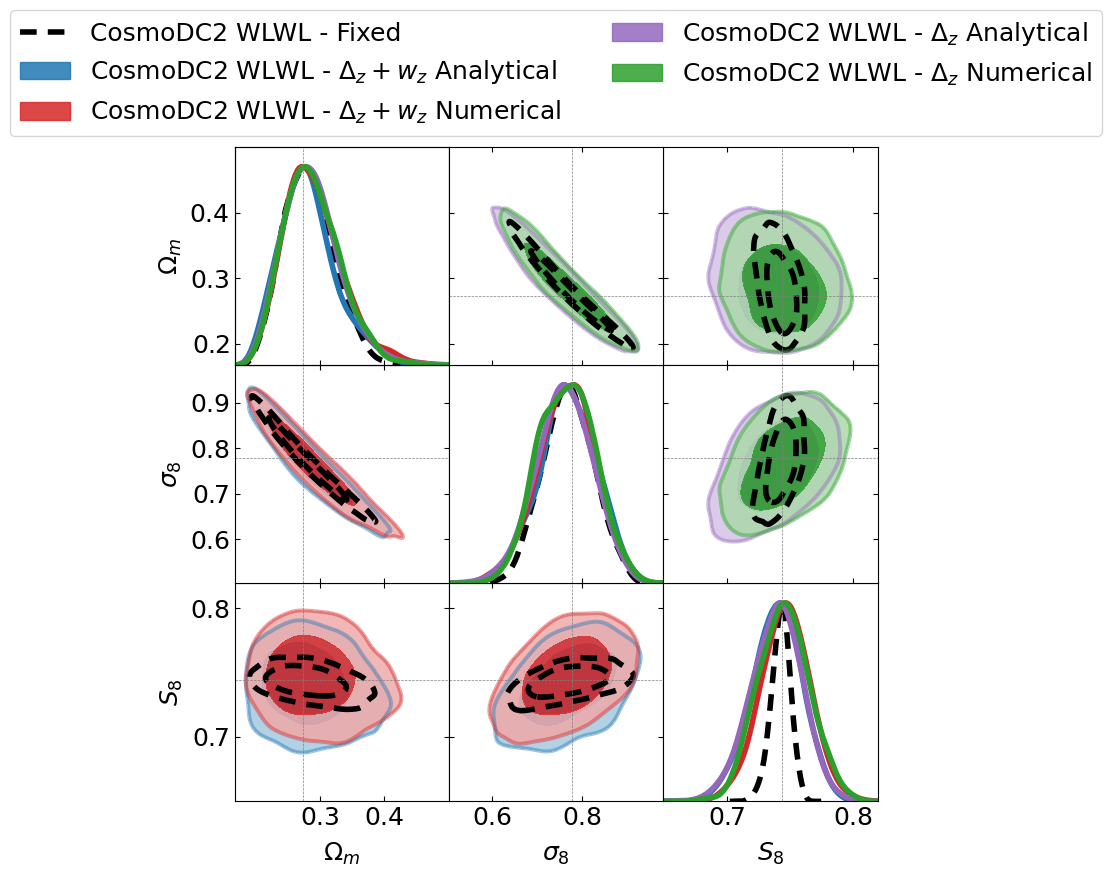

In [38]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_nomarg,
                 samples_wlwl_wzdz_ana,
                 samples_wlwl_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_wlwl_nomarg,
                                samples_wlwl_dz_ana,
                                samples_wlwl_dz_num
                               ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_wlwl.pdf")

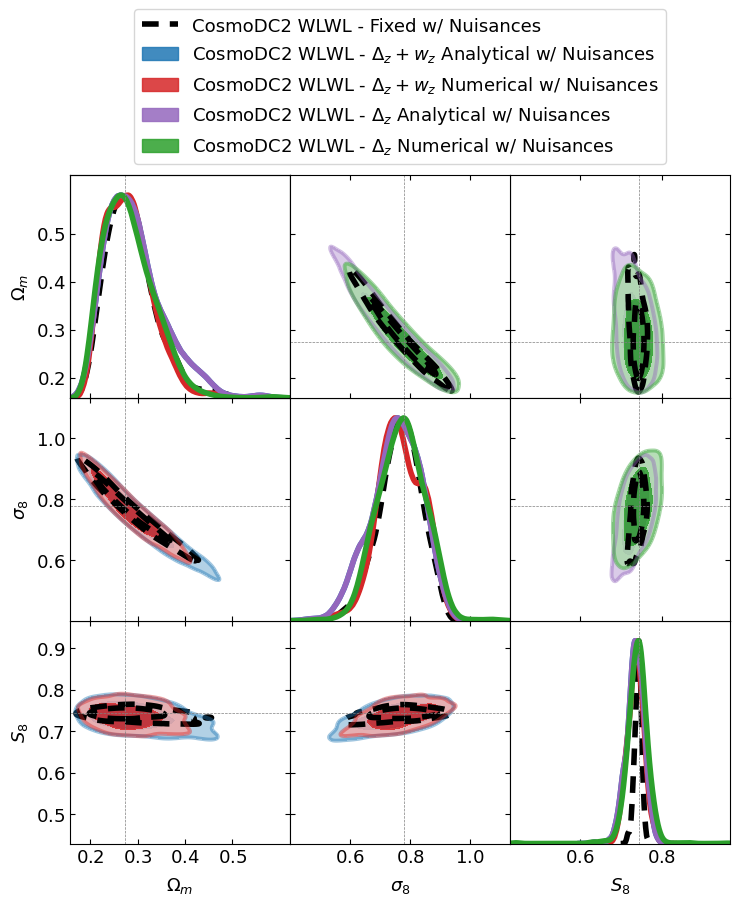

In [39]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_wlwl_nuisance_nomarg,
                 samples_wlwl_nuisance_wzdz_ana,
                 samples_wlwl_nuisance_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_wlwl_nuisance_nomarg,
                                samples_wlwl_nuisance_dz_ana,
                                samples_wlwl_nuisance_dz_num
                               ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=1,
                 markers=prat_markers)

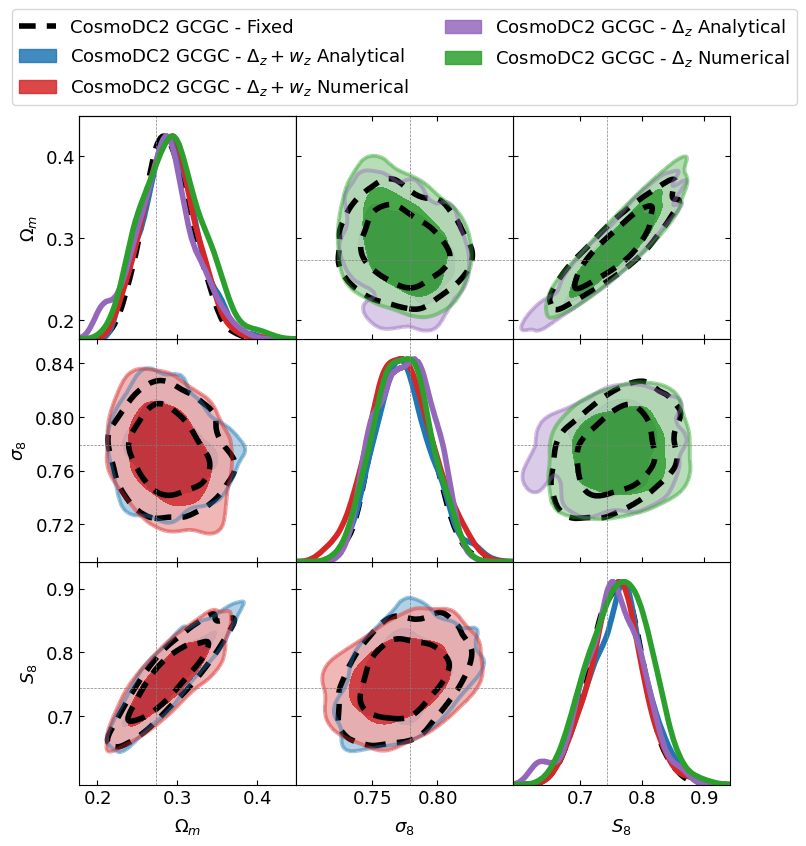

In [40]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_gcgc_nomarg,
                 samples_gcgc_wzdz_ana,
                 samples_gcgc_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_gcgc_nomarg,
                                samples_gcgc_dz_ana,
                                samples_gcgc_dz_num,
                                 ],
                upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_gcgc.pdf")

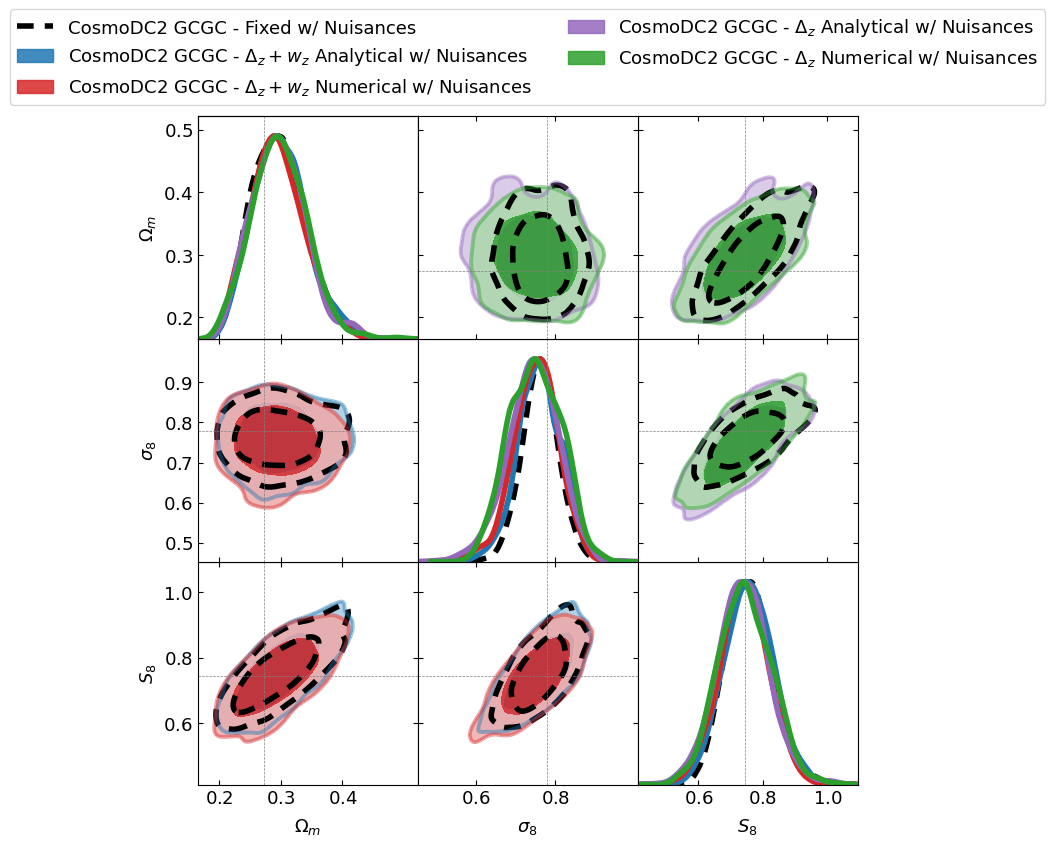

In [41]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_gcgc_nuisance_nomarg,
                 samples_gcgc_nuisance_wzdz_ana,
                 samples_gcgc_nuisance_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_gcgc_nuisance_nomarg,
                                samples_gcgc_nuisance_dz_ana,
                                samples_gcgc_nuisance_dz_num,
                                 ],
                upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)

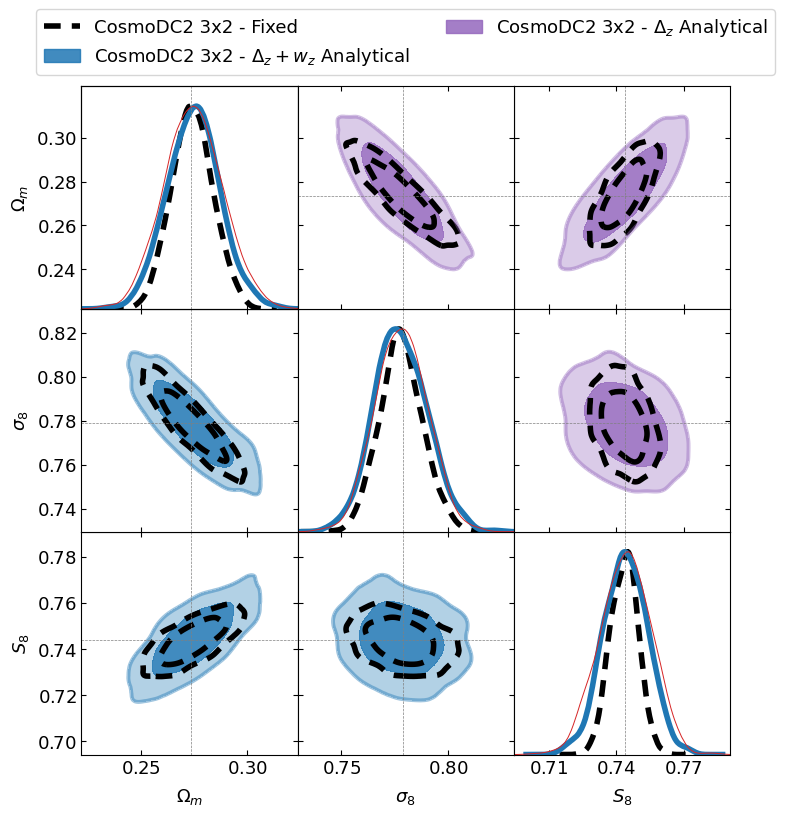

In [42]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nomarg,
                 samples_3x2_wzdz_ana,
                 #samples_3x2_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nomarg,
                                samples_3x2_dz_ana,
                                #samples_3x2_dz_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_3x2.pdf")

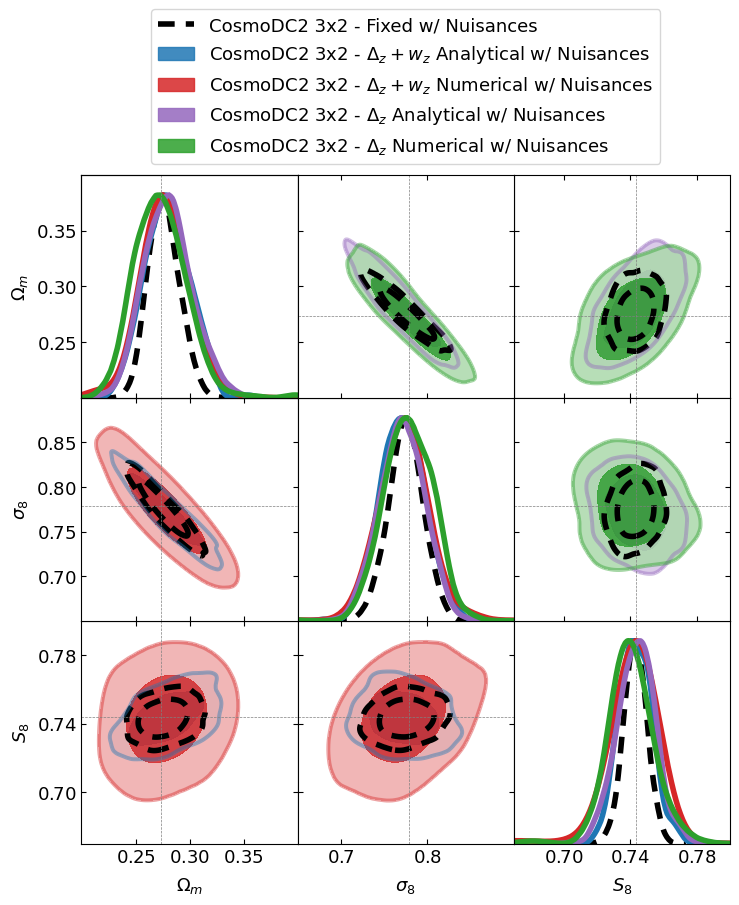

In [43]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                 samples_3x2_nuisance_wzdz_ana,
                 samples_3x2_nuisance_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_dz_ana,
                                samples_3x2_nuisance_dz_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.65, 0.9), 'S8':(0.67, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=1,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_3x2.pdf")

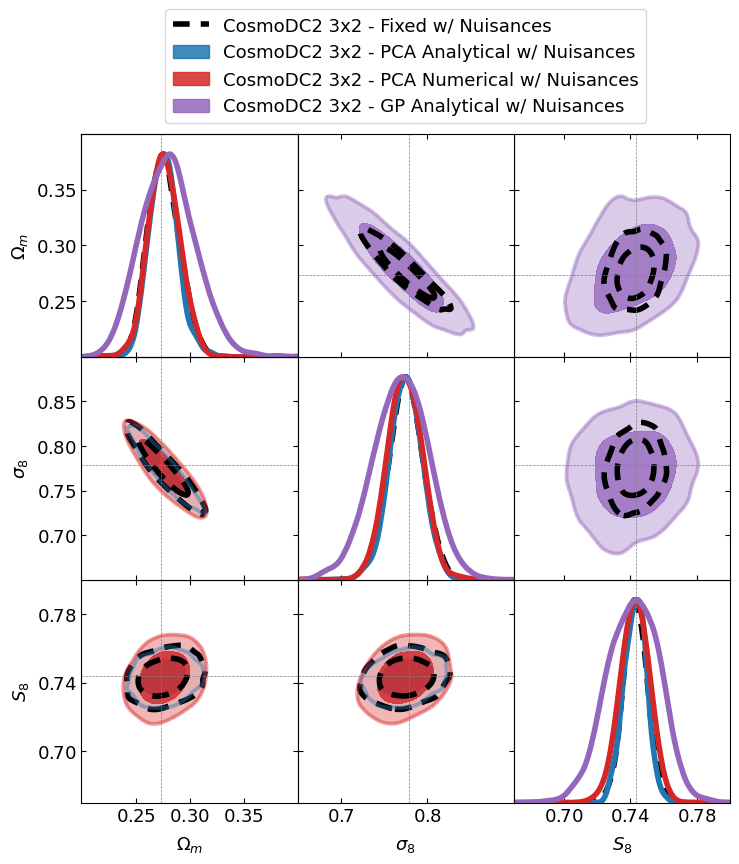

In [44]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                 samples_3x2_nuisance_PCA_ana,
                 samples_3x2_nuisance_PCA_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_gp_ana,
                                #samples_3x2_nuisance_gp_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                param_limits={'Ωm':(0.2, 0.4), 'σ8':(0.65, 0.9), 'S8':(0.67, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=1,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_3x2.pdf")

## Shifts and Widths

In [45]:
print(np.mean(chain_gcgc_nuisance_dz_num["Ωm"]), np.std(chain_gcgc_nuisance_dz_num["Ωm"]))
print(np.mean(chain_gcgc_nuisance_dz_num["Ωbb"]), np.std(chain_gcgc_nuisance_dz_num["Ωbb"]))
print(np.mean(chain_gcgc_nuisance_dz_num["σ8"]), np.std(chain_gcgc_nuisance_dz_num["σ8"]))
print(np.mean(chain_gcgc_nuisance_dz_num["h"]), np.std(chain_gcgc_nuisance_dz_num["h"]))
print(np.mean(chain_gcgc_nuisance_dz_num["ns"]), np.std(chain_gcgc_nuisance_dz_num["ns"]))
print(np.mean(chain_gcgc_nuisance_dz_num["lens_1_b"]), np.std(chain_gcgc_nuisance_dz_num["lens_1_b"]))
print(np.mean(chain_gcgc_nuisance_dz_num["lens_2_b"]), np.std(chain_gcgc_nuisance_dz_num["lens_2_b"]))
print(np.mean(chain_gcgc_nuisance_dz_num["lens_3_b"]), np.std(chain_gcgc_nuisance_dz_num["lens_3_b"]))
print(np.mean(chain_gcgc_nuisance_dz_num["lens_4_b"]), np.std(chain_gcgc_nuisance_dz_num["lens_4_b"]))
print(np.mean(chain_gcgc_nuisance_dz_num["lens_5_b"]), np.std(chain_gcgc_nuisance_dz_num["lens_5_b"]))

0.29854999846709646 0.04368721531856542
0.46110890506399793 0.10343329044008433
0.7491984927762332 0.06331827382869962
0.7217350957449653 0.03931473880082542
0.9640471391936408 0.07416743065811322
0.9132082807336734 0.10224835723699047
1.0980361436995634 0.1076346499769832
1.2658720751758086 0.11255607586132274
1.4048499873534566 0.12743327433322255
1.4845132161638763 0.5745857173485862


In [46]:
print(np.mean(chain_gcgc_nuisance_dz_num["dzs_lens[1]"]), np.std(chain_gcgc_nuisance_dz_num["dzs_lens[1]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["dzs_lens[2]"]), np.std(chain_gcgc_nuisance_dz_num["dzs_lens[2]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["dzs_lens[3]"]), np.std(chain_gcgc_nuisance_dz_num["dzs_lens[3]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["dzs_lens[4]"]), np.std(chain_gcgc_nuisance_dz_num["dzs_lens[4]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["dzs_lens[5]"]), np.std(chain_gcgc_nuisance_dz_num["dzs_lens[5]"]))

-0.012087869220371287 0.049438569792473866
0.000766069422426215 0.04117320778443791
0.0006366459381145492 0.034103302370083126
0.0005960938182633794 0.03228478265767185
0.0005460596701478033 0.02992647425211345


In [47]:
print(np.mean(chain_gcgc_nuisance_dz_num["alphas[1]"]), np.std(chain_gcgc_nuisance_dz_num["alphas[1]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["alphas[2]"]), np.std(chain_gcgc_nuisance_dz_num["alphas[2]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["alphas[3]"]), np.std(chain_gcgc_nuisance_dz_num["alphas[3]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["alphas[4]"]), np.std(chain_gcgc_nuisance_dz_num["alphas[4]"]))
print(np.mean(chain_gcgc_nuisance_dz_num["alphas[5]"]), np.std(chain_gcgc_nuisance_dz_num["alphas[5]"]))

-0.24027960816253863 0.9827273906829243
0.0027927494674918566 0.9580108222686496
0.009178618334206608 1.0060609949544284
-0.034263260918342996 0.9020627030758646
-0.0194207243337048 0.9009527952426797


In [48]:
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[1]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[1]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[2]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[2]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[3]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[3]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[4]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[4]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[5]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[5]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[6]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[6]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[7]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[7]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[8]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[8]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[9]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[9]"]))
print(np.mean(chain_gcgc_nuisance_wzdz_num["alphas[10]"]), np.std(chain_gcgc_nuisance_wzdz_num["alphas[10]"]))

-0.12819184467538258 0.9812269817851758
0.039769807941128166 1.010097727451937
0.09583623441552203 0.9109990979580678
-0.060209173314620695 1.0580383271280467
-0.009240668044203136 1.0017355472477356
0.011281903055137914 0.9371880186994108
0.026922860517969296 1.007982845288229
-0.002954722131671942 1.0372599000864828
-0.014664813739086065 1.0260744879003096
-0.005522238367427475 0.9257062645729774


In [49]:
print(np.mean(chain_wlwl_nuisance_dz_num["alphas_source[1]"]), np.std(chain_wlwl_nuisance_dz_num["alphas_source[1]"]))
print(np.mean(chain_wlwl_nuisance_dz_num["alphas_source[2]"]), np.std(chain_wlwl_nuisance_dz_num["alphas_source[2]"]))
print(np.mean(chain_wlwl_nuisance_dz_num["alphas_source[3]"]), np.std(chain_wlwl_nuisance_dz_num["alphas_source[3]"]))
print(np.mean(chain_wlwl_nuisance_dz_num["alphas_source[4]"]), np.std(chain_wlwl_nuisance_dz_num["alphas_source[4]"]))
print(np.mean(chain_wlwl_nuisance_dz_num["alphas_source[5]"]), np.std(chain_wlwl_nuisance_dz_num["alphas_source[5]"]))
print(np.mean(chain_wlwl_nuisance_dz_num["A_IA"]), np.std(chain_wlwl_nuisance_dz_num["A_IA"]))

-0.13083732185835487 0.5642184384358544
0.008457524172740894 0.5147927142719669
0.056896268384386814 0.9333707191323116
-0.0513986512811911 0.9645386166582686
0.05079755904349668 0.9513925534815162
0.19185876952577116 0.36272153383111744


In [50]:
g = plots.get_subplot_plotter(width_inch=15)
g.plots_1d([samples_wzdz_prior,
            samples_3x2_nuisance_dz_num_4,
            samples_3x2_nuisance_wzdz_num_3], 
           ['dzs_lens[1]', 'dzs_lens[2]', 'dzs_lens[3]', 'dzs_lens[4]', 'dzs_lens[5]',
            'dzs_source[1]', 'dzs_source[2]', 'dzs_source[3]', 'dzs_source[4]', 'dzs_source[5]',
            'wzs_lens[1]', 'wzs_lens[2]', 'wzs_lens[3]', 'wzs_lens[4]', 'wzs_lens[5]',
            'wzs_source[1]', 'wzs_source[2]', 'wzs_source[3]', 'wzs_source[4]', 'wzs_source[5]'],
            lws=3, ls=['--', '-', '-'], nx=5, legend_ncol=3);

g.export("./paper_plots/wzdz.pdf")

NameError: name 'samples_3x2_nuisance_dz_num_4' is not defined

## Likelihood

In [ ]:
lkl_gcgc_nomarg  = np.transpose(np.transpose(np.array(chain_gcgc_nuisance_nomarg))[13:154])
lkl_wlwl_nomarg  = np.transpose(np.transpose(np.array(chain_wlwl_nuisance_nomarg))[9:234])
lkl_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_3x2_nuisance_nomarg))[14:622])

In [ ]:
xi2_wlwl_nomarg = np.array(chain_wlwl_nuisance_nomarg['lp'])
xi2_gcgc_nomarg = np.array(chain_gcgc_nuisance_nomarg['lp'])
xi2_3x2_nomarg  = np.array(chain_3x2_nuisance_nomarg['lp'])

In [ ]:
lkl_wlwl_nomarg_m, lkl_wlwl_nomarg_s = np.mean(lkl_wlwl_nomarg, axis=1), np.std(lkl_wlwl_nomarg, axis=1)
lkl_gcgc_nomarg_m, lkl_gcgc_nomarg_s = np.mean(lkl_gcgc_nomarg, axis=1), np.std(lkl_gcgc_nomarg, axis=1)
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [ ]:
lkl_wlwl_nomarg_cles = [pacc.ClTheoryEnsemble(cle_wlwl, np.array(lkl_wlwl_nomarg[i])) for i in range(len(lkl_wlwl_nomarg))] 
lkl_gcgc_nomarg_cles = [pacc.ClTheoryEnsemble(cle_gcgc, np.array(lkl_gcgc_nomarg[i])) for i in range(len(lkl_gcgc_nomarg))]
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]

In [ ]:
sel_wlwl = np.random.choice(len(lkl_wlwl_nomarg), 100)
sel_gcgc = np.random.choice(len(lkl_gcgc_nomarg), 100)
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 100)

In [ ]:
lkl_wlwl_nomarg_cles = np.array(lkl_wlwl_nomarg_cles)[sel_wlwl]
lkl_gcgc_nomarg_cles = np.array(lkl_gcgc_nomarg_cles)[sel_gcgc]

In [ ]:
g = pacc.plot_cls([[cle_gcgc], lkl_gcgc_nomarg_cles], cle_gcgc.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_gcgc_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_gcgc.png", bbox_inches='tight')

In [ ]:
g = pacc.plot_cls([[cle_wlwl], lkl_wlwl_nomarg_cles], cle_wlwl.pairs,
              configs=[
                  {"colors":['black'], "show_legend":False},
                  {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_wlwl.png", bbox_inches='tight')

In [ ]:
cross_pairs =  [['source_0', 'lens_0'],
 ['source_0', 'lens_1'],
 ['source_0', 'lens_2'],
 ['source_0', 'lens_3'],
 ['source_0', 'lens_4'],
 ['source_1', 'lens_0'],
 ['source_1', 'lens_1'],
 ['source_1', 'lens_2'],
 ['source_1', 'lens_3'],
 ['source_1', 'lens_4'],
 ['source_2', 'lens_0'],
 ['source_2', 'lens_1'],
 ['source_2', 'lens_2'],
 ['source_2', 'lens_3'],
 ['source_2', 'lens_4'],
 ['source_3', 'lens_0'],
 ['source_3', 'lens_1'],
 ['source_3', 'lens_2'],
 ['source_3', 'lens_3'],
 ['source_3', 'lens_4'],
 ['source_4', 'lens_0'],
 ['source_4', 'lens_1'],
 ['source_4', 'lens_2'],
 ['source_4', 'lens_3'],
 ['source_4', 'lens_4']]

In [ ]:
g = pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles], cle_3x2.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_3x2.png", bbox_inches='tight')